In [1]:
import pandas as pd
df = pd.read_csv("ShellData.csv")
df.head()

C:\Users\ReneJ\AppData\Local\Temp\ipykernel_24632\246597612.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("ShellData.csv")


,Unnamed: 0,TagName,EventTime,Status,Value
0,0,A2PS64V0J.:ZUX09R,2024-01-02 20:03:46.000,Good,0.34
1,1,A2PS64V0J.:ZUX09R,2024-01-02 16:00:12.000,Good,0.15
2,2,A2PS64V0J.:ZUX09R,2024-01-02 11:56:42.000,Good,0.13
3,3,A2PS64V0J.:ZUX09R,2024-01-02 07:53:11.000,Good,0.12
4,4,A2PS64V0J.:ZUX09R,2024-01-02 03:49:45.000,Good,0.13


In [2]:
df["Status"].value_counts()

Status
Good                 213642667
Bad                    1347992
Substituted, Good          253
Questionable               190
Name: count, dtype: int64

In [ ]:
df["Value"].value_counts()

In [ ]:
len(df["TagName"].unique())

In [ ]:
import numpy as np
s = df["EventTime"].astype(str)

has_ms = s.str.contains(r"\.\d+$") 
vals   = np.where(has_ms, s, s + ".000")   

df["EventTime_DT"] = pd.to_datetime(vals, format="%Y-%m-%d %H:%M:%S.%f", errors="coerce")

In [ ]:
df

In [ ]:
s = df["Value"].astype(str).str.strip()

mask = ~s.str.match(r"^[+-]?\d+(\.\d+)?([eE][+-]?\d+)?$")

invalid_counts = s[mask].value_counts()

invalid_counts

In [ ]:
t = df[df["Value"] == "Not Connect"]
t

In [ ]:
invalid_counts.sum()

In [ ]:
df2 = df.groupby(df["TagName"])

In [ ]:
df2.EventTime_DT.describe()

In [ ]:
summary = (
    df.groupby("TagName")["EventTime_DT"]
      .agg(['min', 'max'])
      .assign(LengthInDays=lambda x: x["max"] - x["min"])
      .assign(LengthInSeconds=lambda x: (x["max"] - x["min"]).dt.total_seconds())
      .reset_index()
)
summary

In [ ]:
print("Mean: " + str(summary["LengthInDays"].mean()))
print("Median: " + str(summary["LengthInDays"].median()))
print("Mode: " + str(summary["LengthInDays"].mode()))
print("Min: " + str(summary["LengthInDays"].min()))
print("Max: " + str(summary["LengthInDays"].max()))

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(summary["LengthInSeconds"], bins=50)
plt.xlabel("Dauer (Sekunden)")
plt.ylabel("Anzahl Zeitreihen")
plt.title("Verteilung der Zeitreihen-Längen")
plt.tight_layout()
plt.show()


In [ ]:
df_short = summary[summary["LengthInSeconds"] < 2353540.737]

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(df_short["LengthInSeconds"], bins=50)
plt.xlabel("Dauer (Sekunden)")
plt.ylabel("Anzahl Zeitreihen")
plt.title("Verteilung der Zeitreihen-Längen")
plt.tight_layout()
plt.show()

In [ ]:
df["is_numeric"] = pd.to_numeric(df["Value"], errors="coerce").notna()

In [ ]:
table = pd.crosstab(df["Status"], df["is_numeric"])
table.columns = ["String", "Numeric"]
table = table.rename(columns={True: "Numeric", False: "String"})
print(table)

In [ ]:
percent_table = table.div(table.sum(axis=1), axis=0) * 100
print(percent_table.round(2))


In [ ]:
tags_with_strings = (
    df.loc[~df["is_numeric"], "TagName"]
      .dropna()
      .unique()
)
print("Anzahl Tags mit String-Values:", len(tags_with_strings))

In [5]:
df["EventTime"].dtype

dtype('O')

In [8]:
df["EventTime"][0]

'2024-01-02 20:03:46.000'

In [11]:
import numpy as np
s = df["EventTime"].astype(str)

has_ms = s.str.contains(r"\.\d+$")          # hat .fff am Ende
vals   = np.where(has_ms, s, s + ".000")    # fehlende .000 ergänzen

df["EventTime_DT"] = pd.to_datetime(vals, format="%Y-%m-%d %H:%M:%S.%f", errors="coerce")

In [10]:
df["EventTime"][10550000]

'2024-01-10 05:42:44'

In [15]:
df

,Unnamed: 0,TagName,EventTime,Status,Value,EventTime_DT
0,0,A2PS64V0J.:ZUX09R,2024-01-02 20:03:46.000,Good,0.34,2024-01-02 20:03:46
1,1,A2PS64V0J.:ZUX09R,2024-01-02 16:00:12.000,Good,0.15,2024-01-02 16:00:12
2,2,A2PS64V0J.:ZUX09R,2024-01-02 11:56:42.000,Good,0.13,2024-01-02 11:56:42
3,3,A2PS64V0J.:ZUX09R,2024-01-02 07:53:11.000,Good,0.12,2024-01-02 07:53:11
4,4,A2PS64V0J.:ZUX09R,2024-01-02 03:49:45.000,Good,0.13,2024-01-02 03:49:45
...,...,...,...,...,...,...
214991097,214991097,SHRQHC:2VR_XN7_V,2024-06-29 15:57:58.000,Bad,Calc Failed,2024-06-29 15:57:58
214991098,214991098,Ceia3wAoRc35lrPLMr1.lP.xSvRDPiw: K0Fde.sprEeT,2024-06-29 15:35:41.000,Bad,No Result,2024-06-29 15:35:41
214991099,214991099,.EF.KiPDrteoLvpar5Td3eePRLd3RRctC0cai:PS.1,2024-06-29 15:35:41.000,Bad,Failed,2024-06-29 15:35:41
214991100,214991100,:oCLE1FqT.3pc5.e0PRK.TriS3RP,2024-06-29 15:35:41.000,Bad,No Result,2024-06-29 15:35:41


In [16]:
s = df["Value"].astype(str).str.strip()
mask = ~s.str.match(r"^[+-]?\d+(\.\d+)?([eE][+-]?\d+)?$")
invalid_counts = s[mask].value_counts()

invalid_counts

Value
Calc Failed      231627
Bad Input         98155
nan               74875
No Result         47516
Failed            47516
Out of Serv       43917
Bad               19920
Scan Timeout       1452
Comm Fail           694
I/O Timeout         208
Doubtful             41
Not Connect          34
Pt Created           12
Invalid Float         8
Scan Off              2
Name: count, dtype: int64

In [3]:
t = df[df["Value"] == "Not Connect"]
t

,Unnamed: 0,TagName,EventTime,Status,Value
214545234,214545234,-.H00CPV4V:0P2CV,2024-02-10 08:06:33.335,Bad,Not Connect
214545235,214545235,-1190:PVL.2CVI0VP,2024-02-10 08:06:33.319,Bad,Not Connect
214545236,214545236,.P7P0C-081:V4VSCP,2024-02-10 08:06:33.304,Bad,Not Connect
214545237,214545237,P31:.418PVCV-I0PV,2024-02-10 08:06:33.304,Bad,Not Connect
214545238,214545238,:V_CdPDU7BVG-G_LRVPOA_3IS.F6PN,2024-02-10 08:06:33.304,Bad,Not Connect
214545239,214545239,V7P1I:24VQP0VC.-,2024-02-10 08:06:33.319,Bad,Not Connect
214545240,214545240,1A._VNVIO0PC:-GVUPR2DB_PS4LG1F_a,2024-02-10 08:06:33.304,Bad,Not Connect
214545242,214545242,-C20PV4IPP0.VV1:6,2024-02-10 08:06:33.304,Bad,Not Connect
214545243,214545243,_OEVaCI_S_VDLGBND-:RGPVUEF.OAA2P,2024-02-10 08:06:33.304,Bad,Not Connect
214545244,214545244,DS6_1GU_AI.LOGVP-2FRnPV2BVC_:NP,2024-02-10 08:06:33.304,Bad,Not Connect


In [18]:
invalid_counts.sum()

565977

In [19]:
df2 = df.groupby(df["TagName"])

In [25]:
df2.EventTime_DT.describe()

,count,mean,min,25%,50%,75%,max
TagName,,,,,,,
13UP1R.:OC2YWCNT7 V7PTDHVAV30,18587,2024-05-16 12:45:07.243454464,2024-04-29 05:56:21.104000,2024-05-10 18:40:03.078499840,2024-05-16 04:29:17.025999872,2024-05-19 19:44:46.912000,2024-05-28 19:15:21.841000
F.:TSRDIKVYRPLTVACT6620S5,101,2024-02-13 20:22:40.615990272,2024-01-30 07:44:57.559000,2024-02-06 05:20:17.728999936,2024-02-13 14:12:19.913999872,2024-02-21 09:02:40.161999872,2024-02-28 17:02:40.162000
RVSOU2D 6HD.C2:NY6V5O0PT,231,2024-05-20 07:28:38.451779328,2024-04-29 02:19:28.199000,2024-05-15 22:07:47.268999936,2024-05-23 16:58:50.540999936,2024-05-26 09:42:15.516999936,2024-05-28 19:15:42.223000
SD.P6 2DT25OHOVYCT6FRVS:0,97,2024-03-14 07:16:36.381072128,2024-02-29 01:02:40.162000,2024-03-06 17:25:11.316000,2024-03-14 01:10:32.387000064,2024-03-21 17:10:32.387000064,2024-03-29 17:10:32.387000
T1V.C_NX2:E0DSMI_P8PUE,140,2024-06-15 22:12:32.636071680,2024-05-29 02:01:49.517000,2024-06-07 02:11:25.672499968,2024-06-16 20:07:40.556999936,2024-06-26 01:57:41.982000128,2024-06-27 23:56:24.263000
...,...,...,...,...,...,...,...
yS:L1C0(KT3.4F.3PC)lRdTE.5P,10933,2024-06-10 14:51:08.589865216,2024-05-29 00:00:36,2024-06-02 22:15:36,2024-06-08 15:05:41,2024-06-18 06:45:41,2024-06-27 23:55:41
yiu(c2elLuS:oSKcTisdSE)C51ltP.3.DPtt0et.aFaRng3nC,16844,2024-07-13 03:30:47.620458240,2024-06-28 00:00:41,2024-07-05 17:19:22.249999872,2024-07-13 03:35:38.500000,2024-07-20 13:21:54.750000128,2024-07-27 23:55:41
yl:F.E35RT).3PdTC.03C1K(LPS,13019,2024-01-17 18:04:47.855134976,2024-01-05 15:57:44,2024-01-11 16:54:12.500000,2024-01-17 17:32:44,2024-01-23 19:04:12.500000,2024-01-29 23:57:44


In [37]:
summary = (
    df.groupby("TagName")["EventTime_DT"]
      .agg(['min', 'max'])
      .assign(LengthInDays=lambda x: x["max"] - x["min"])
      .assign(LengthInSeconds=lambda x: (x["max"] - x["min"]).dt.total_seconds())
      .reset_index()
)
summary

,TagName,min,max,LengthInDays,LengthInSeconds
0,13UP1R.:OC2YWCNT7 V7PTDHVAV30,2024-04-29 05:56:21.104,2024-05-28 19:15:21.841,29 days 13:19:00.737000,2553540.737
1,F.:TSRDIKVYRPLTVACT6620S5,2024-01-30 07:44:57.559,2024-02-28 17:02:40.162,29 days 09:17:42.603000,2539062.603
2,RVSOU2D 6HD.C2:NY6V5O0PT,2024-04-29 02:19:28.199,2024-05-28 19:15:42.223,29 days 16:56:14.024000,2566574.024
3,SD.P6 2DT25OHOVYCT6FRVS:0,2024-02-29 01:02:40.162,2024-03-29 17:10:32.387,29 days 16:07:52.225000,2563672.225
4,T1V.C_NX2:E0DSMI_P8PUE,2024-05-29 02:01:49.517,2024-06-27 23:56:24.263,29 days 21:54:34.746000,2584474.746
...,...,...,...,...,...
7754,yS:L1C0(KT3.4F.3PC)lRdTE.5P,2024-05-29 00:00:36.000,2024-06-27 23:55:41.000,29 days 23:55:05,2591705.000
7755,yiu(c2elLuS:oSKcTisdSE)C51ltP.3.DPtt0et.aFaRng3nC,2024-06-28 00:00:41.000,2024-07-27 23:55:41.000,29 days 23:55:00,2591700.000
7756,yl:F.E35RT).3PdTC.03C1K(LPS,2024-01-05 15:57:44.000,2024-01-29 23:57:44.000,24 days 08:00:00,2102400.000
7757,yrStdi.iPcupE).tSlTaCSL0leCcRaG(5t1f13gKa3P:vc...,2024-02-29 00:02:44.000,2024-03-29 23:55:41.000,29 days 23:52:57,2591577.000


In [45]:
print("Mean: " + str(summary["LengthInDays"].mean()))
print("Median: " + str(summary["LengthInDays"].median()))
print("Mode: " + str(summary["LengthInDays"].mode()))
print("Min: " + str(summary["LengthInDays"].min()))
print("Max: " + str(summary["LengthInDays"].max()))

Mean: 26 days 04:26:05.923513339
Median: 29 days 23:30:00
Mode: 0   0 days
Name: LengthInDays, dtype: timedelta64[ns]
Min: 0 days 00:00:00
Max: 29 days 23:59:59


In [38]:
import matplotlib.pyplot as plt

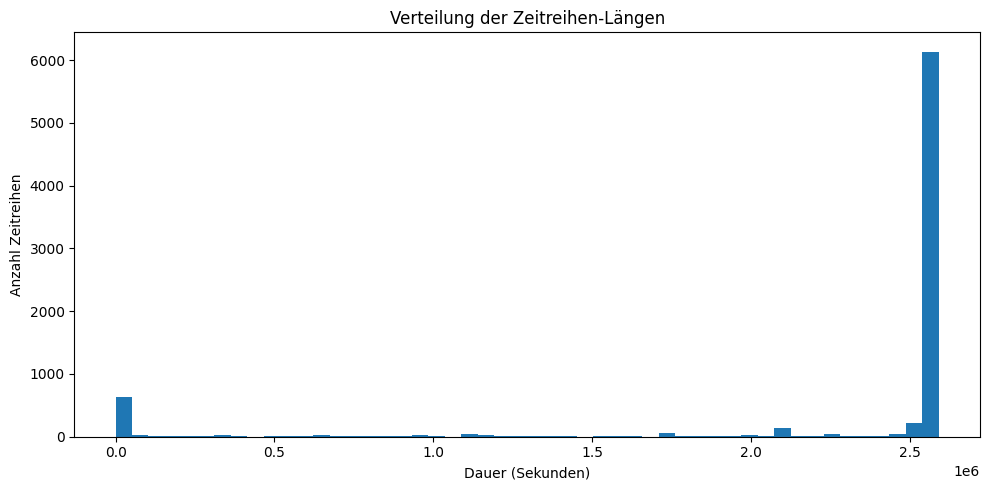

In [39]:
plt.figure(figsize=(10,5))
plt.hist(summary["LengthInSeconds"], bins=50)
plt.xlabel("Dauer (Sekunden)")
plt.ylabel("Anzahl Zeitreihen")
plt.title("Verteilung der Zeitreihen-Längen")
plt.tight_layout()
plt.show()


In [40]:
df_short = summary[summary["LengthInSeconds"] < 2353540.737]

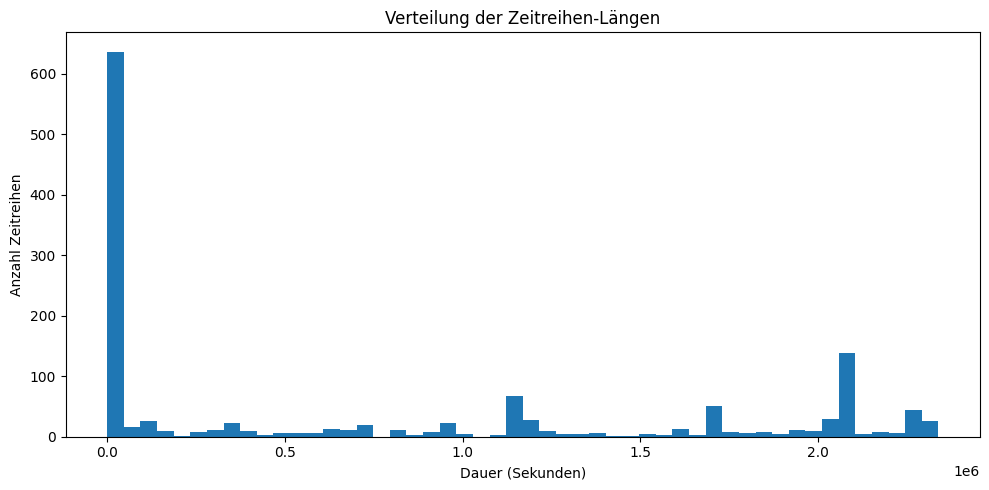

In [41]:
plt.figure(figsize=(10,5))
plt.hist(df_short["LengthInSeconds"], bins=50)
plt.xlabel("Dauer (Sekunden)")
plt.ylabel("Anzahl Zeitreihen")
plt.title("Verteilung der Zeitreihen-Längen")
plt.tight_layout()
plt.show()

In [4]:
df["is_numeric"] = pd.to_numeric(df["Value"], errors="coerce").notna()

In [5]:
table = pd.crosstab(df["Status"], df["is_numeric"])
table.columns = ["String", "Numeric"]
table = table.rename(columns={True: "Numeric", False: "String"})
print(table)

                   String    Numeric
Status                              
Bad                565977     782015
Good                    0  213642667
Questionable            0        190
Substituted, Good       0        253


In [7]:
percent_table = table.div(table.sum(axis=1), axis=0) * 100
print(percent_table.round(2))


                   String  Numeric
Status                            
Bad                 41.99    58.01
Good                 0.00   100.00
Questionable         0.00   100.00
Substituted, Good    0.00   100.00


In [10]:
tags_with_strings = (
    df.loc[~df["is_numeric"], "TagName"]
      .dropna()
      .unique()
)
print("Anzahl Tags mit String-Values:", len(tags_with_strings))

Anzahl Tags mit String-Values: 1396
